In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
# We change the default level of the logger so that
# we can see what's happening with caching.
import logging, sys, os
logger = logging.getLogger('21cmFAST')

logger.setLevel(logging.INFO)

import py21cmfast as p21c

# For plotting the cubes, we use the plotting submodule:
from py21cmfast import plotting

# For interacting with the cache
from py21cmfast import cache_tools
cache_tools.clear_cache()

/work/submit/yitians/anaconda3/envs/21cmfast/lib/python3.7/site-packages/py21cmfast/_cfg.py:59: UserWarning: Your configuration file is out of date. Updating...
  "Your configuration file is out of date. Updating..."
/work/submit/yitians/anaconda3/envs/21cmfast/lib/python3.7/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")
2023-01-21 05:36:35,045 | INFO | Removing InitialConditions_2eda6b944366038a89d6590f0449374d_r54321.h5
2023-01-21 05:36:35,048 | INFO | Removed 1 files from cache.


/work/submit/yitians/anaconda3/envs/21cmfast/lib/python3.7/site-packages/py21cmfast/inputs.py:488: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  "The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be "


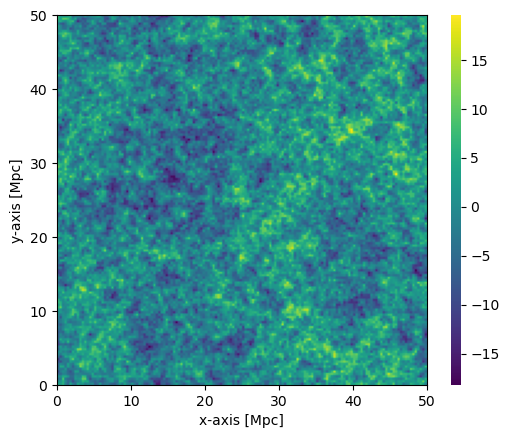

In [2]:
initial_conditions = p21c.initial_conditions(
    user_params = {"HII_DIM": 50, "BOX_LEN": 50},
    cosmo_params = p21c.CosmoParams(SIGMA_8=0.8),
    random_seed=54321
)

plotting.coeval_sliceplot(initial_conditions, "hires_density");

In [3]:
input_heating = p21c.input_heating(redshift = 35., init_boxes = initial_conditions)
input_ionization = p21c.input_ionization(redshift = 35., init_boxes = initial_conditions)

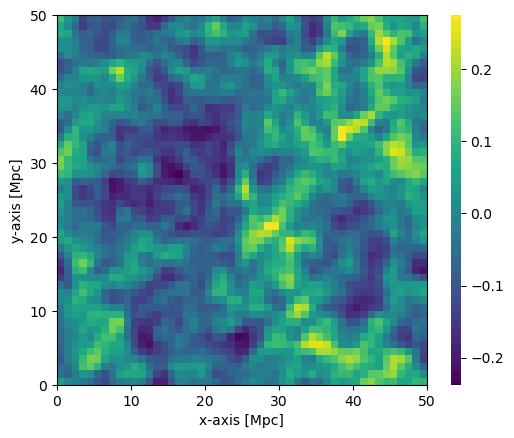

In [4]:
perturbed_field = p21c.perturb_field(redshift = 35.0, init_boxes = initial_conditions
)

plotting.coeval_sliceplot(perturbed_field, "density");


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


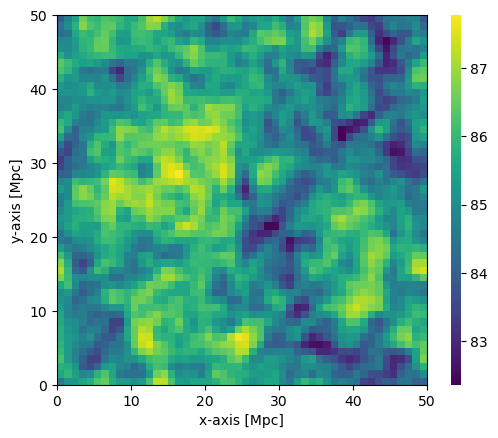

In [5]:
spin_temp = p21c.spin_temperature(perturbed_field = perturbed_field, zprime_step_factor=1.05)
plotting.coeval_sliceplot(spin_temp, "Ts_box");

The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


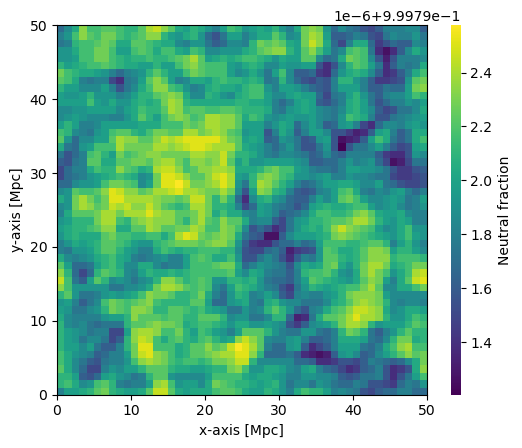

In [6]:
ionized_box = p21c.ionize_box(spin_temp = spin_temp, zprime_step_factor=1.05,)
plotting.coeval_sliceplot(ionized_box, "xH_box");

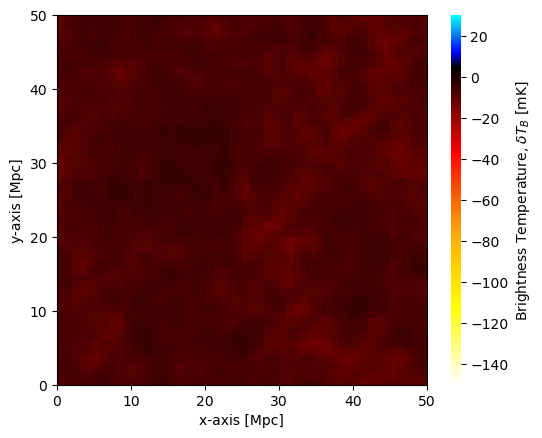

In [7]:
brightness_temp = p21c.brightness_temperature(ionized_box = ionized_box,
                                              perturbed_field = perturbed_field,
                                              spin_temp = spin_temp)

plotting.coeval_sliceplot(brightness_temp);
